# Spatial relations

The following makes use of the *sf* package. You may need to install it from
[CRAN](https://cran.r-project.org/package=sf) using the code
`install.packages("sf")` if you want to run this on your computer. (The
package is already installed on the notebook container, however.)

In [1]:
library(sf)

Linking to GEOS 3.11.1, GDAL 3.6.2, PROJ 9.1.1; sf_use_s2() is TRUE


The file `"south-america-1990.RData"` loaded below was created in a previous example was created in a previous example.

In [2]:
load("south-america-1990.RData")

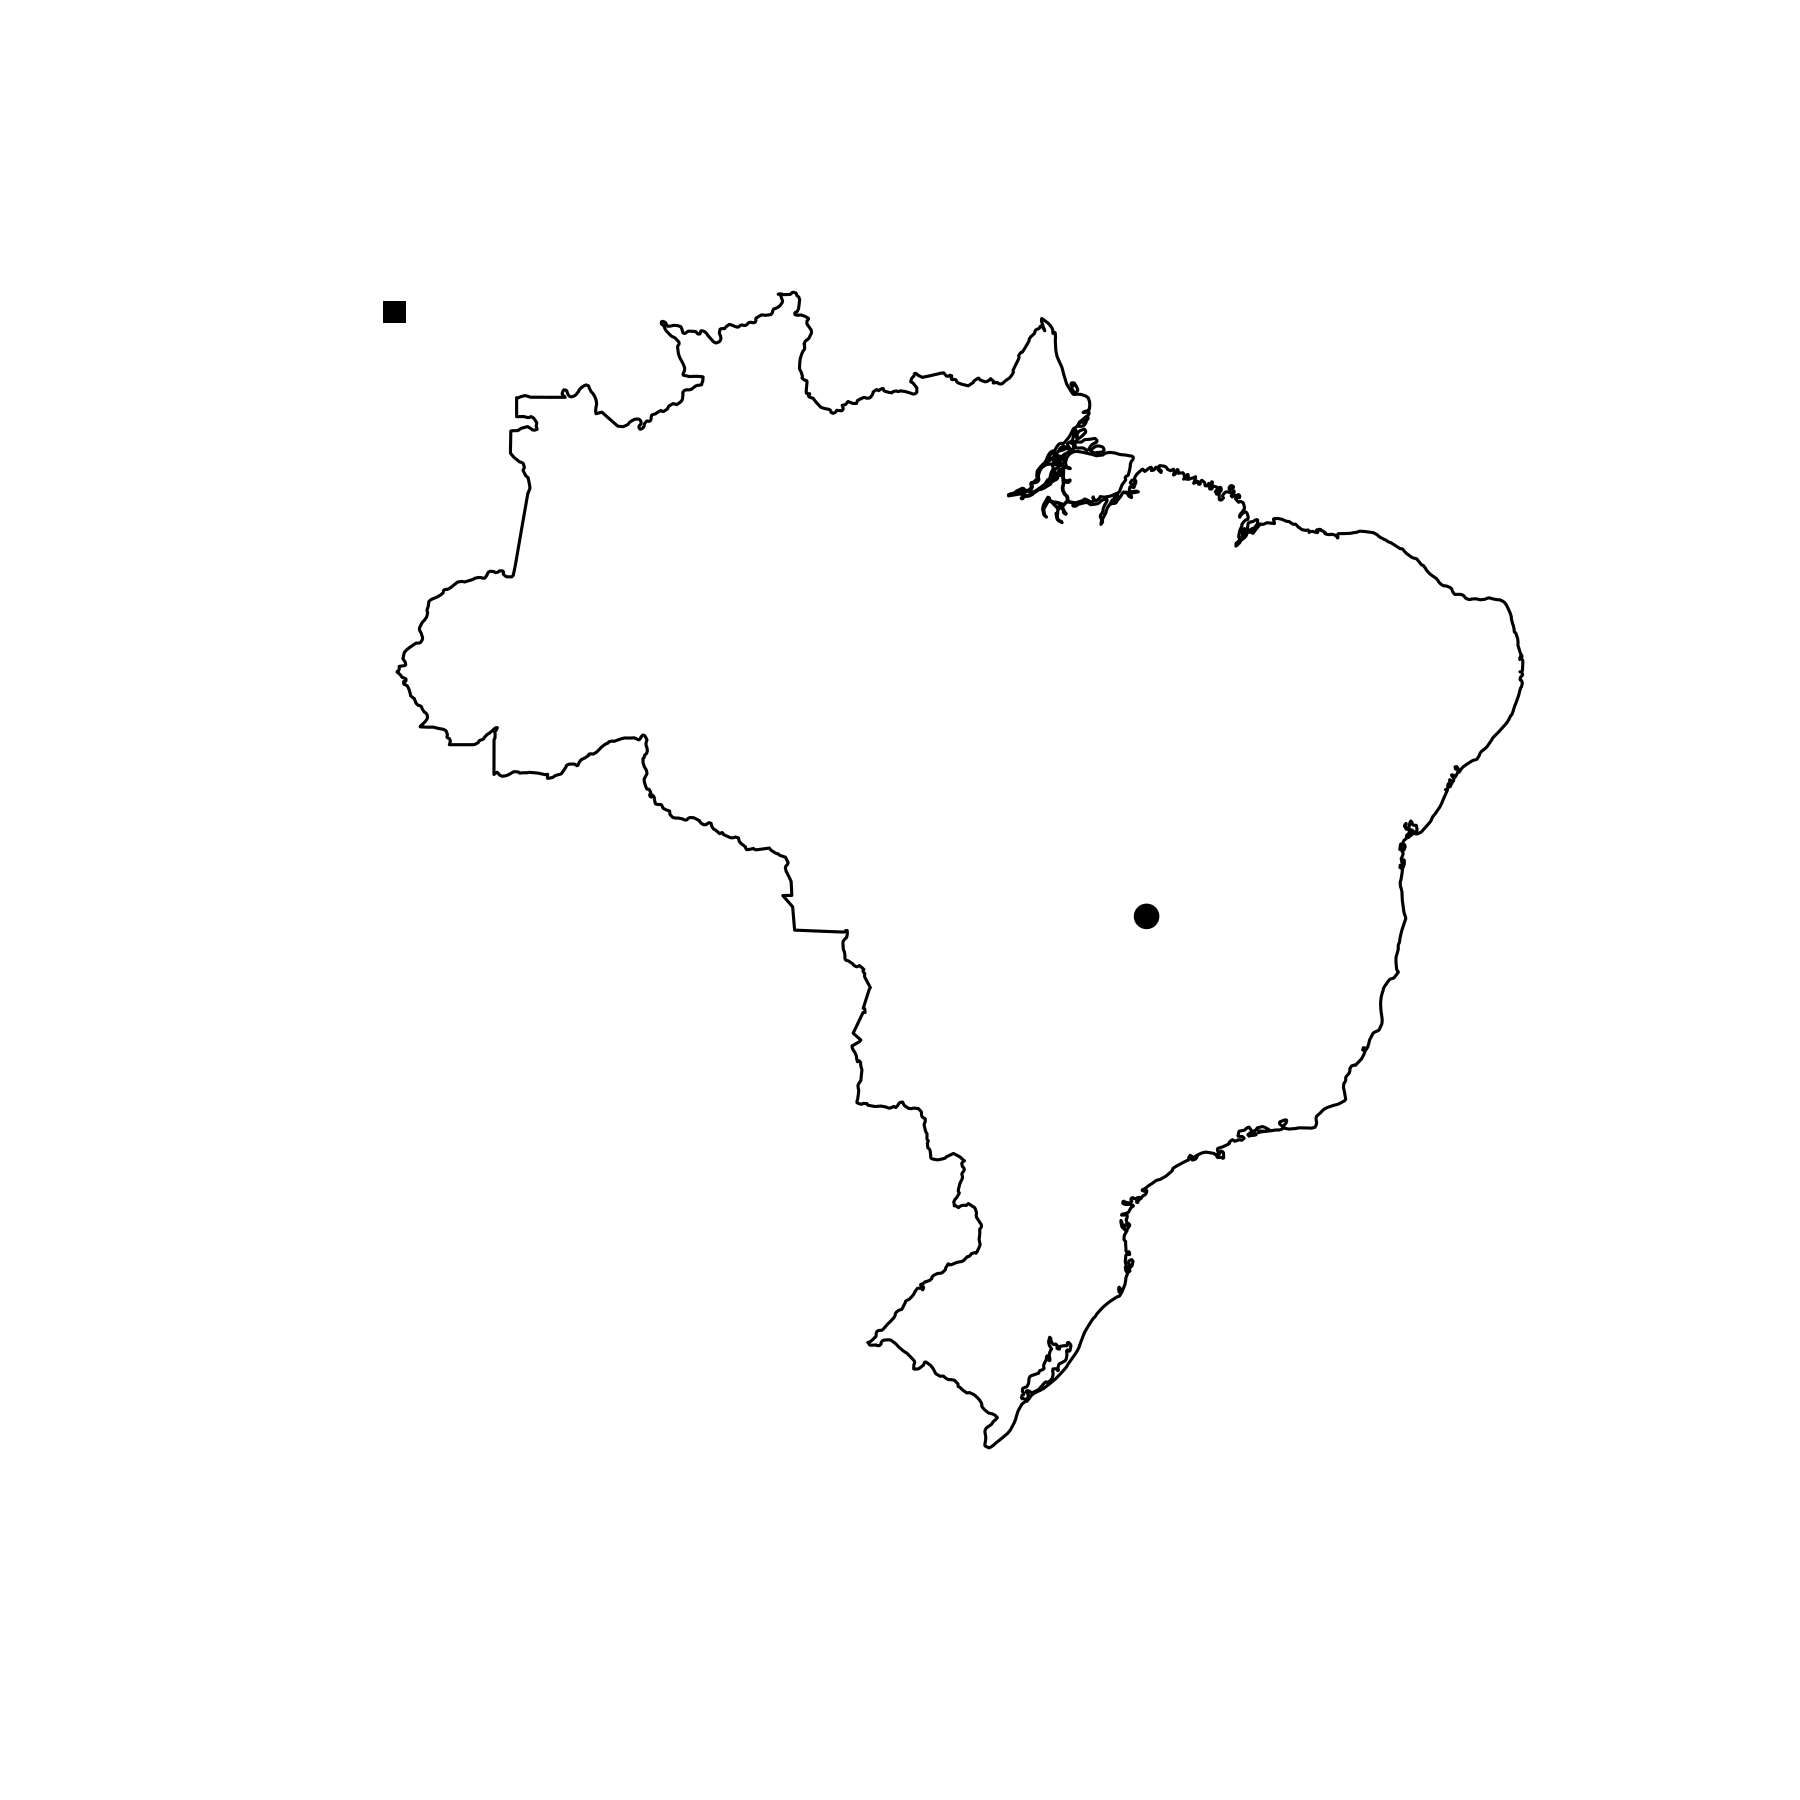

In [3]:
plot_g <- function(x,...) plot(st_geometry(x),...)
plot_g(Brazil)
plot_g(Brasilia,add=TRUE,pch=19) # Circle
plot_g(Bogota,add=TRUE,pch=15) # Square

In [4]:
st_contains(Brazil,Brasilia,sparse=FALSE)

     [,1]
[1,] TRUE

In [5]:
st_contains(Brazil,Bogota,sparse=FALSE)

      [,1]
[1,] FALSE

In [6]:
load("cshapes-1990.RData")
ThreeCountries <-
    subset(cshapes.1990,
           CNTRY_NAME %in% c("Brazil","Chile","Colombia"))
rownames(ThreeCountries) <- ThreeCountries$CNTRY_NAME

In [7]:
ThreeCapitals <-
    subset(cshapes.capitals.1990,
           CNTRY_NAME %in% c("Brazil","Chile","Colombia"))
rownames(ThreeCapitals) <- ThreeCapitals$CAPNAME

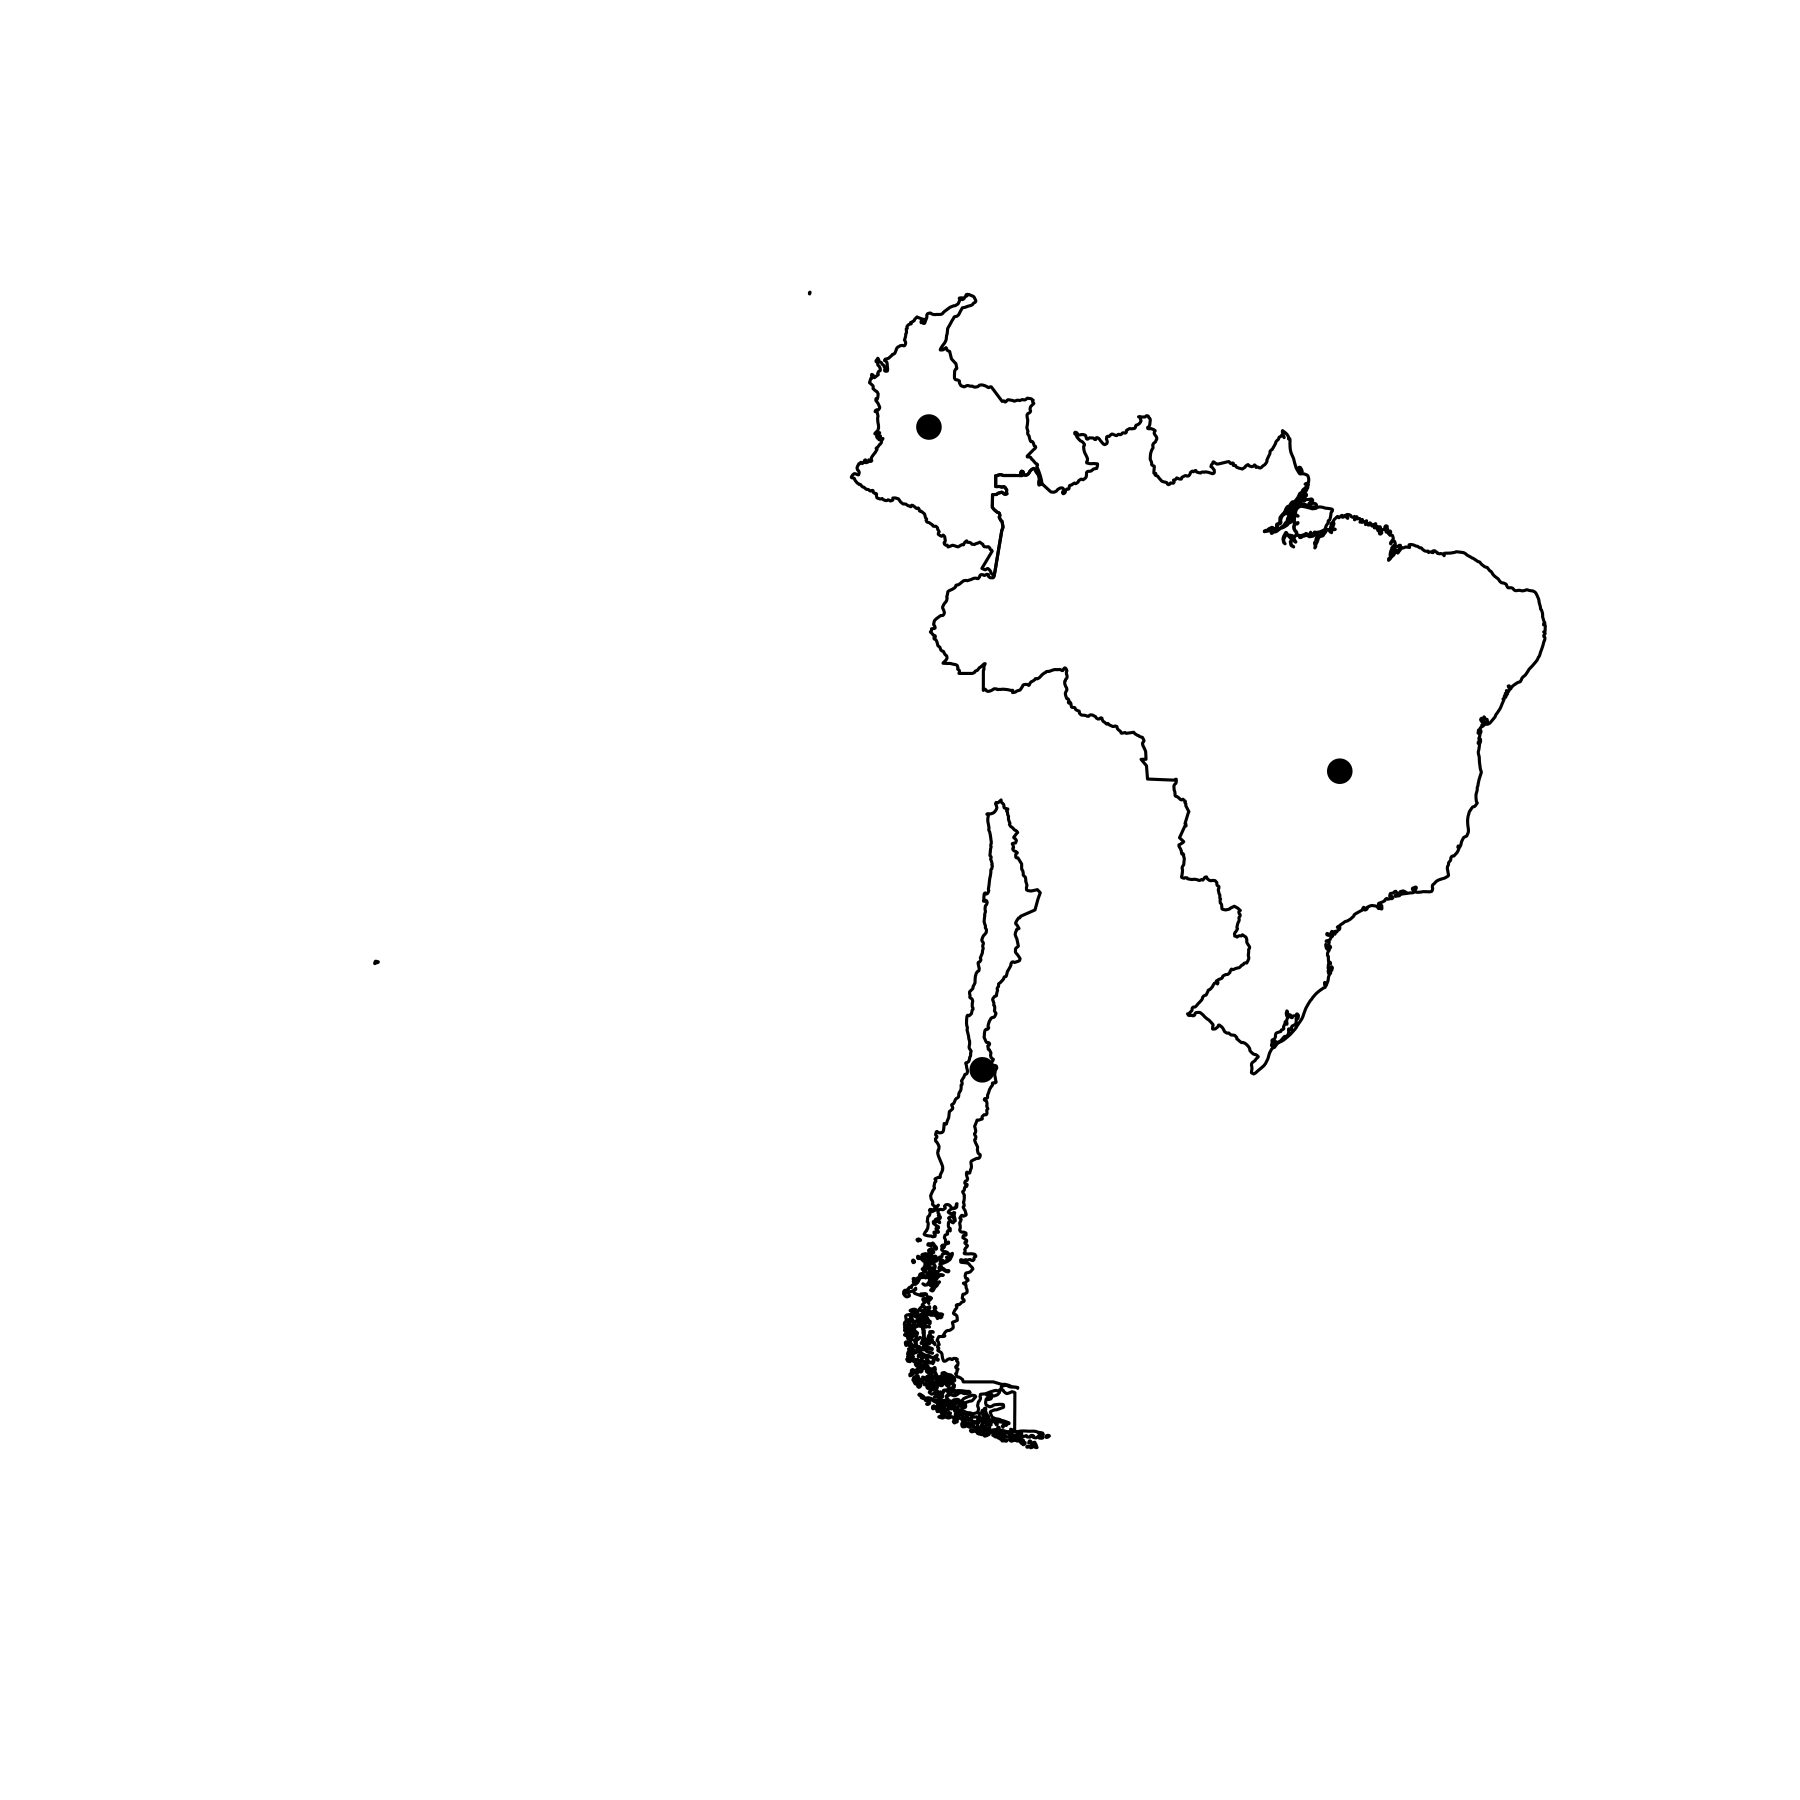

In [8]:
plot_g(ThreeCountries)
plot_g(ThreeCapitals,add=TRUE,pch=19)

In [9]:
st_contains(ThreeCountries,ThreeCapitals,sparse=FALSE)

      [,1]  [,2]  [,3]
[1,]  TRUE FALSE FALSE
[2,] FALSE  TRUE FALSE
[3,] FALSE FALSE  TRUE

In [10]:
structure(
   st_contains(ThreeCountries,ThreeCapitals,sparse=FALSE),
   dimnames=list(rownames(ThreeCountries),rownames(ThreeCapitals))
)

         Brasilia Santiago Bogota
Brazil       TRUE    FALSE  FALSE
Chile       FALSE     TRUE  FALSE
Colombia    FALSE    FALSE   TRUE

In [11]:
st_touches(Brazil,Colombia,sparse=FALSE)

     [,1]
[1,] TRUE

In [12]:
st_touches(Brazil,Chile,sparse=FALSE)

      [,1]
[1,] FALSE

In [13]:
structure(
   st_touches(ThreeCountries,sparse=FALSE),
   dimnames=list(rownames(ThreeCountries),rownames(ThreeCountries))
)

         Brazil Chile Colombia
Brazil    FALSE FALSE     TRUE
Chile     FALSE FALSE    FALSE
Colombia   TRUE FALSE    FALSE

In [14]:
save(ThreeCountries,ThreeCapitals,file="three-countries.RData")